<a href="https://colab.research.google.com/github/KKugi/machine-learning-programming/blob/main/11_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVM

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_loc = 'http://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')

In [ ]:
df.tail(5)

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


In [ ]:
df_positive = df[df['y']>0] # y가 1인 데이터만 추출
df_negative = df[df['y']==0] # y가 0인 데이터만 추출

In [ ]:
import matplotlib.pyplot as plt

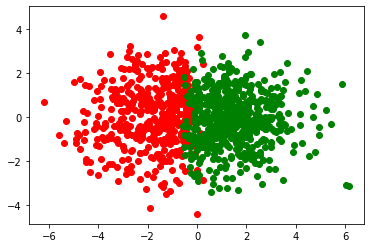

In [ ]:
plt.scatter(df_positive['x1'],df_positive['x2'],color='r')
plt.scatter(df_negative['x1'],df_negative['x2'],color='g')

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
X = df[['x1','x2']].to_numpy()
y = df['y']

In [ ]:
svm_simple = LinearSVC(C=1,loss='hinge')
svm_simple.fit(X,y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [ ]:
svm_simple.predict([[0.12,0.56],[-4,40],[0,40],[5,20]])

array([0, 1, 1, 0])

In [ ]:
from yellowbrick.contrib.classifier import DecisionViz

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)


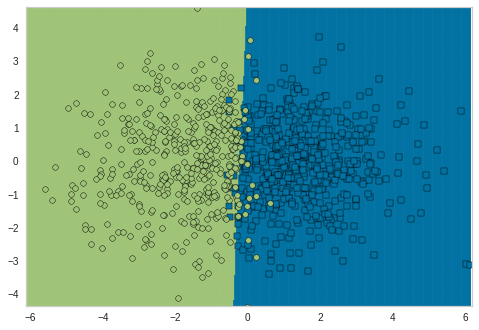

In [ ]:
viz = DecisionViz(svm_simple, title = 'linear SVM')
viz.fit(X,y)
viz.draw(X,y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
svm_std = Pipeline([
    ('std',StandardScaler()),
    ('lsvm',LinearSVC(C=1,loss='hinge'))
])
svm_std.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lsvm',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_poly = Pipeline([
        ('std',StandardScaler()),
        ('poly_inputs',PolynomialFeatures(degree=3)),
        ('lsmv',LinearSVC(C=0.01,loss='hinge'))
])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:68: FutureWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=FutureWarning)


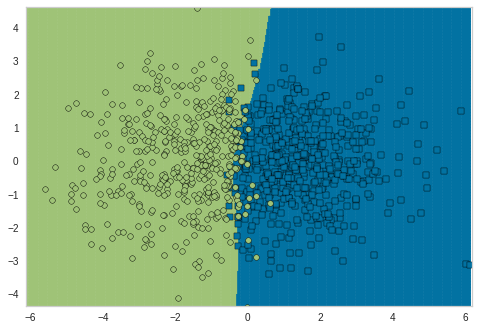

In [ ]:
svm_poly.fit(X,y)
viz = DecisionViz(svm_poly, title = 'polynomial feature SVM')
viz.fit(X,y)
viz.draw(X,y)